#IMPORT

In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr
import pytesseract

import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 800)
import matplotlib.pyplot as plt
import os
import imutils
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

import re

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Prepare Data

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/FINAL PROJECT/Data/Additives.csv", encoding= 'unicode_escape')
df.head()

,Number,Name,Other Name,Usage
0,E100,Curcumin,NaN,"Naturally occurring orange/yellow colour, extracted from the spice turmeric"
1,E101,Riboflavin or lactoflavin,NaN,Naturally occurring B group vitamin usually obtained from yeast or produced synthetically.
2,E102,Tartrazine,Yellow 5,Widely used yellow/orange colour
3,E104,Quinoline Yellow,NaN,"A synthetic coal tar dye, greenish yellow in colour"
4,E110,Sunset Yellow,NaN,"A synthetic coal tar dye, yellow in colour, used with E102"


In [ ]:
df.loc[df.Name=="Curcumin", "Side Effects"] = "As a component of turmeric, curcumin may interact with prescription drugs and dietary supplements. In high amounts, it may be unsafe for women during pregnancy. May cause side effects, such as nausea, diarrhea, hives, or dizziness"
df.loc[df.Name=="Curcumin", "Other Name"] = "Tumeric Yellow"
df.loc[df.Name=="Riboflavin", "Side Effects"] = "Riboflavin may cause urine to have a more yellow color than normal, especially if large doses are taken. This is to be expected and is no cause for alarm. Usually, however, riboflavin does not cause any side effects"
df.loc[df.Name=="Riboflavin", "Other Name"] = "Vitamin B2"
df.loc[df.Name=="Xanthan Gum", "Side Effects"] = "Asthma, Skin irritation, Hay fever"
df.loc[df.Name=="Xanthan Gum", "Other Name"] = "Xanthan Gum"
df.loc[df.Name.str.contains("Xylitol"), "Other Name"] = "Crapinol"
df.loc[df.Name.str.contains("Xylitol"), "Side Effects"] = "Heavy ingestion might cause intestinal discomfort or gas"
df.loc[df.Name=="Tartrazine", "Side Effects"] = "Hyperactivity, Asthma, Urticaria, Rhinitis, Bronchospasm, Blurred vision, Skin problems, Insomnia, Night terrors, aspirin sensitivity; migraine, purple skin patches. Banned in Norway and Austria."
df.loc[df.Name=="Sunset Yellow", "Side Effects"] = "The FSA recommended that children showing signs of hyperactivity or attention deficit hyperactivity disorder (ADHD) should avoid. Some people show allergic reactions to it (rashes, swelling, vomiting), hyperactivity; allergies; aspirin sensitivity, kidney tumours, chromosomal damage, abdominal pain, nausea and vomiting, indigestion, distaste for food; Asthma, Urticaria, Insomnia, Angioedema, seen increased incidence of tumours in animals."
df.loc[df.Name=="Sunset Yellow", "Other Name"] = "Yellow 6"
df.loc[df.Name=="Sunset Yellow", "Name"] = "Sunset Yellow FCF"
df.loc[df.Name=="Sorbitol", "Side Effects"] = "Can cause intestinal discomfort, gas, bloating, flatulence, and diarrhea"
df.loc[df.Name=="Sorbitol", "Other Name"] = "Crapinol"
df.loc[df.Name=="Saccharin", "Side Effects"] = "Can cause allergic reactions in people that can't tolerate sulfa drugs. Common allergic reactions include breathing difficulties, headaches, skin irritation, and diarrhea"
df.loc[df.Name=="Saccharin", "Other Name"] = "Saccharin"
df.loc[df.Name=="Potassium Nitrite", "Side Effects"] = "May cause dizziness, headaches, difficult breathing, potential carcinogen. NOT SUITABLE FOR BABIES UNDER SIX MONTHS. Causes destruction of red blood corpuscles, Cancer, Asthma."
df.loc[df.Name=="Potassium Nitrite", "Other Name"] = "Potassium Nitrite"
df.loc[df.Name=="Sodium Nitrite", "Side Effects"] = "Under certain conditions, such as in processed meats, like hot dogs, luncheon meats and sausages, sodium nitrite and nitrate react with amino acids to form cancer-causing chemicals called nitrosamines. This reaction can be hindered by the addition of ascorbic acid, erythorbic acid, or alphatocopherol. 'Organic' manufacturers replace sodium nitrite and nitrate with celery juice which naturally contains very high eves of sodium nitrite, but the harmful effects remain the same. When the label says 'no added nitrites' but there is celery juice, food scientists say it still causes colon cancer just the same. NOT SUITABLE FOR BABIES UNDER SIX MONTHS"
df.loc[df.Name=="Sodium Nitrite", "Other Name"] = "Celery juice"
df.loc[df.Name.str.contains("Erythro"), "Side Effects"] = "The FSA recommended that children showing signs of hyperactivity or attention deficit hyperactivity disorder (ADHD) should avoid. Might increase thyroid hormone levels and lead to hyperthyroidism. Can cause sensitivity to light, was shown to cause thyroid cancer in rats in a study in 1990. May also cause urticaria, insomnia and asthma."
df.loc[df.Name.str.contains("Erythro"), "Other Name"] = "Red 3"
df.loc[df.Name.str.contains("Allura Red"), "Side Effects"] = "May be an allergen in allergic skin conditions, has also been connected with cancer in mice and can cause hyperactivity"
df.loc[df.Name.str.contains("Allura Red"), "Other Name"] = "Red 40"
df.loc[df.Name.str.contains("Propyl Gallate"), "Side Effects"] = "Propyl Gallate can cause allergic reactions in the form of an asthma attack in some people. It can also cause stomach and skin irritation, liver damage, kidney damage and has the potential to increase your chances of having cancer"
df.loc[df.Name.str.contains("Propyl Gallate"), "Other Name"] = "Propyl Gallate"
df.loc[df.Name.str.contains("Monosodium Glutamate"), "Side Effects"] = "NOT SAFE FOR BABIES AND YOUNG CHILDREN. Heart palpitations, Headaches, Dizzyness, Muscle tightening, Nausea, Weakness of the upper arms, Neck pain, Migraine, Hyperactivity, Asthma, Urticaria, Insomnia. As this substance is not suitable for babies under six months we suggest it would be advisable for pregnant and lactating mothers to avoid it also unless/until it is proven safe in these circumstances. Can cause adverse reactions, allergies, aspirin sensitivity, obesity and up to 40% increase in apetite"
df.loc[df.Name.str.contains("Monosodium Glutamate"), "Other Name"] = "MSG"
df.loc[df.Name.str.contains("glycerides"), "Side Effects"] = "No harmful effects have been specifically associated with mono- or diglycerides."
df.loc[df.Name.str.contains("glycerides"), "Other Name"] = "Mono- and Diglycerides"
df.loc[df.Name.str.contains("Mannitol"), "Side Effects"] = "Because sugar alcohols are not fully digested, they can cause intestinal discomfort, gas, bloating, flatulence, and diarrhea. But in small quantities, you should be safe from any ill effects"
df.loc[df.Name.str.contains("Mannitol"), "Other Name"] = "Crapinol"
df.loc[df.Name.str.contains("Lecithin"), "Side Effects"] = "Naturally occurring estrogens in Soy Lecithin can cause hormonal problems in Men who consume excessive amounts of it"
df.loc[df.Name.str.contains("Lecithin"), "Other Name"] = "Lecithin"
df.loc[df.Name.str.contains("Carrageenan"), "Side Effects"] = "Allergies, intolerances, Ulcerative colitis, Cancer"
df.loc[df.Name.str.contains("Carrageenan"), "Other Name"] = "Carrageenan"
df.loc[df.Name.str.contains("Brilliant Blue"), "Side Effects"] = "The FSA recommended that children showing signs of hyperactivity or attention deficit hyperactivity disorder (ADHD) should avoid. Causes hyperactivity, asthma, urticaria and insomnia"
df.loc[df.Name.str.contains("Brilliant Blue"), "Name"] = "Brilliant Blue FCF"
df.loc[df.Name.str.contains("Brilliant Blue"), "Other Name"] = "Blue 1"
df.loc[df.Name.str.contains("Sodium phosphate", na=False), "Side Effects"] = "Can cause vomitting, headache, reduced urine output, bloating, abdominal pain, dizziness, seizure"
df.loc[df.Name.str.contains("Sodium phosphate"), "Usage"] = "Often used as emulsifiers (as in processed cheese), thickening agents, and leavening agents for baked goods"
df.loc[df.Name.str.contains("Sodium phosphate"), "Other Name"] = "Sodium phosphates"
df.loc[df.Number.str.contains("E451", na=False), "Side Effects"] = "Breathing problems, Diarrhea and vomiting, Eye irritation, Low blood pressure"
df.loc[df.Number.str.contains("E451", na=False), "Other Name"] = "Soda Ash or Disodium Carbonate"
df.loc[df.Number.str.contains("E451", na=False), "Usage"] = "Emulsifiers, Humectant, Sequestrant, Stabiliser, Thickener"
df.loc[df.Number=="E501", "Number"] = "E501i"
df.loc[df.Number.str.contains("E501i", na=False), "Side Effects"] = "None Known"
df.loc[df.Number.str.contains("E501i", na=False), "Other Name"] = "Potassium Carbonates"
df.loc[df.Number.str.contains("E501i", na=False), "Usage"] = "A water-soluble salt with its main applications in the production of glass, detergents (soaps), ceramics, fertilizers, agrochemicals, pharmaceuticals, food, feed, fire extinguisher, drying agent for solvents and etc"
df.loc[df.Number.str.contains("E160b", na=False), "Side Effects"] = "Annatto is safe for most people in general. Some may experience an allergic reaction to it, including itchiness, swelling, low blood pressure, hives, and stomach pain. The FSA recommended that children showing signs of hyperactivity or attention deficit hyperactivity disorder (ADHD) should avoid"
df.loc[df.Number.str.contains("E160b", na=False), "Other Name"] = "Bixin, Norbixin, Annatto Extracts"
df.loc[df.Number.str.contains("E500", na=False), "Side Effects"] = "No known adverse effects in small quantities"
df.loc[df.Number.str.contains("E500", na=False), "Other Name"] = "Baking Soda"
df = df.append({"Number":"E500i", "Name":"Sodium Carbonate", "Other Name": "Soda Ash or Washing Soda",
           "Usage":"Acidity regulator, anticaking agent, raising agent, and stabilize",
           "Side Effects": "Large amounts cause corrosion of the gut, gastric upsets, circulation problems"
}, ignore_index=True)
df = df.append({"Number":"E164", "Name":"Gardenia Yellow", "Other Name": "Gardenia Yellow",
           "Usage": "Used in the food and beverage industry as a preservative and as an emulsifier, specifically in seafood, meats, and poultry, can make seafood appear firmer, smoother and glossier",
           "Side Effects": "Should be avoided by certain people, including those with Kidney Disease"
}, ignore_index=True)
df = df.append({"Number":"E451i", "Name":"Sodium Phosphate (STP)", "Other Name": "Pentasodium Triphosphate, Sodium Tripolyphosphate (STTP) or Tripolyphosphate (TPP)",
           "Usage": "Natural food colorant, a water soluble yellow food color",
           "Side Effects": "Not allowed in European Countries"
}, ignore_index=True)
df.loc[df.Name=="Agar", "Other Name"] = "Agar"
df.loc[df.Name=="Agar", "Side Effects"] = "No known adverse effects in small quantities. Very large quantities can cause flatulence and distention, Possibly intestinal obstruction"
df.loc[df.Name.str.contains("Calcium Phosphate"), "Usage"] = "Acidity regulator, used in baking powder and acts as a bread enhancer. It also binds metal ions, increases the activity of antioxidants and stabilises the texture of canned vegetables"
df.loc[df.Name.str.contains("Calcium Phosphate"), "Other Name"] = "Calcium Bis(Dihydrogenorthophosphate)"
df.loc[df.Name.str.contains("Calcium Phosphate"), "Side Effects"] = "Designated as safe for general or specific, limited use in food"
df = df.append({"Number":"E341i", "Name":"Dicalcium Phosphate", "Other Name": "Calcium Dihydrogen Phosphate",
           "Usage": "Mainly used as a dietary supplement in prepared breakfast cereals, dog treats, enriched flour, and noodle products",
           "Side Effects": "Designated as safe for general or specific, limited use in food"
}, ignore_index=True)
df = df.drop(index=[39])
df = df.sort_values("Number")

In [ ]:
df[df["Side Effects"].notna()]

,Number,Name,Other Name,Usage,Side Effects
0,E100,Curcumin,Tumeric Yellow,"Naturally occurring orange/yellow colour, extracted from the spice turmeric","As a component of turmeric, curcumin may interact with prescription drugs and dietary supplements. In high amounts, it may be unsafe for women during pregnancy. May cause side effects, such as nausea, diarrhea, hives, or dizziness"
2,E102,Tartrazine,Yellow 5,Widely used yellow/orange colour,"Hyperactivity, Asthma, Urticaria, Rhinitis, Bronchospasm, Blurred vision, Skin problems, Insomnia, Night terrors, aspirin sensitivity; migraine, purple skin patches. Banned in Norway and Austria."
4,E110,Sunset Yellow FCF,Yellow 6,"A synthetic coal tar dye, yellow in colour, used with E102","The FSA recommended that children showing signs of hyperactivity or attention deficit hyperactivity disorder (ADHD) should avoid. Some people show allergic reactions to it (rashes, swelling, vomiting), hyperactivity; allergies; aspirin sensitivity, kidney tumours, chromosomal damage, abdominal pain, nausea and vomiting, indigestion, distaste for food; Asthma, Urticaria, Insomnia, Angioedema, seen increased incidence of tumours in animals."
9,E127,Erythrosine,Red 3,"A synthetic coal tar dye, red in colour, rich in mineral iodine.","The FSA recommended that children showing signs of hyperactivity or attention deficit hyperactivity disorder (ADHD) should avoid. Might increase thyroid hormone levels and lead to hyperthyroidism. Can cause sensitivity to light, was shown to cause thyroid cancer in rats in a study in 1990. May also cause urticaria, insomnia and asthma."
11,E129,Allura Red AC,Red 40,Colouring agent,"May be an allergen in allergic skin conditions, has also been connected with cancer in mice and can cause hyperactivity"
14,E133,Brilliant Blue FCF,Blue 1,"A synthetic coal tar dye, blue in colour. Often mixed with E102 to make green.","The FSA recommended that children showing signs of hyperactivity or attention deficit hyperactivity disorder (ADHD) should avoid. Causes hyperactivity, asthma, urticaria and insomnia"
28,E160b,Annatto,"Bixin, Norbixin, Annatto Extracts",Orange/peach pigment naturally present in butter and cheese.,"Annatto is safe for most people in general. Some may experience an allergic reaction to it, including itchiness, swelling, low blood pressure, hives, and stomach pain. The FSA recommended that children showing signs of hyperactivity or attention deficit hyperactivity disorder (ADHD) should avoid"
333,E164,Gardenia Yellow,Gardenia Yellow,"Used in the food and beverage industry as a preservative and as an emulsifier, specifically in seafood, meats, and poultry, can make seafood appear firmer, smoother and glossier","Should be avoided by certain people, including those with Kidney Disease"
76,E249,Potassium Nitrite,Potassium Nitrite,Naturally occurring mineral used as a preservative and as a colour fixative.,"May cause dizziness, headaches, difficult breathing, potential carcinogen. NOT SUITABLE FOR BABIES UNDER SIX MONTHS. Causes destruction of red blood corpuscles, Cancer, Asthma."
77,E250,Sodium Nitrite,Celery juice,Derived from sodium nitrate by chemical or bacterial action. Acts as a preservative and colour fixative.,"Under certain conditions, such as in processed meats, like hot dogs, luncheon meats and sausages, sodium nitrite and nitrate react with amino acids to form cancer-causing chemicals called nitrosamines. This reaction can be hindered by the addition of ascorbic acid, erythorbic acid, or alphatocopherol. 'Organic' manufacturers replace sodium nitrite and nitrate with celery juice which naturally contains very high eves of sodium nitrite, but the harmful effects remain the same. When the label says 'no added nitrites' but there is celery juice, food scientists say it still causes colon cancer just the same. NOT SUITABLE FOR BABIES UNDER SIX MONTHS"


##Save Data

In [ ]:
df.to_csv(r"/content/gdrive/MyDrive/Colab Notebooks/FINAL PROJECT/Saved_files/Saved_dataset/additives.csv", index=False)

Load Data

In [ ]:
df = pd.read_csv(r"/content/gdrive/MyDrive/Colab Notebooks/FINAL PROJECT/Saved_files/Saved_dataset/additives.csv")

#OCR

##Define Functions

In [ ]:
def ocr2string(img):
  ocr_result = pytesseract.image_to_string(img)
  s = ocr_result.lower()
  s = re.sub(r"^.*:","", s)                             # remove the term Ingredients at the start of the string
  s = re.sub(r"\n"," ", s)                              # remove any newline character
  s = re.sub(r"(\(|\)|\[|\]|\{|\}|\~|\@|\#|\^|\&|\*)","", s)  # remove special characters
  s = re.sub(r" \x0c","", s)                            # remove form feed
  s = re.sub(r"  "," ", s)                              # replace double space by single space
  s = s.strip()                                         # strip space
  s = s.strip(".")                                      # strip "."
  s = s.strip(",")                                      # strip ","
  return s

In [ ]:
def string2additives(string):
  pattern = r"\d{3}[a-i]?"
  match_list = re.findall(pattern, string)
  try:
    mask = np.column_stack([df["Number"] == "E"+i for i in match_list])
    print("This product might contain these additives: ")
    return df.loc[mask.any(axis=1)]
  except:
    return "No additives can be found in our database. Please try another product"

##Test 1

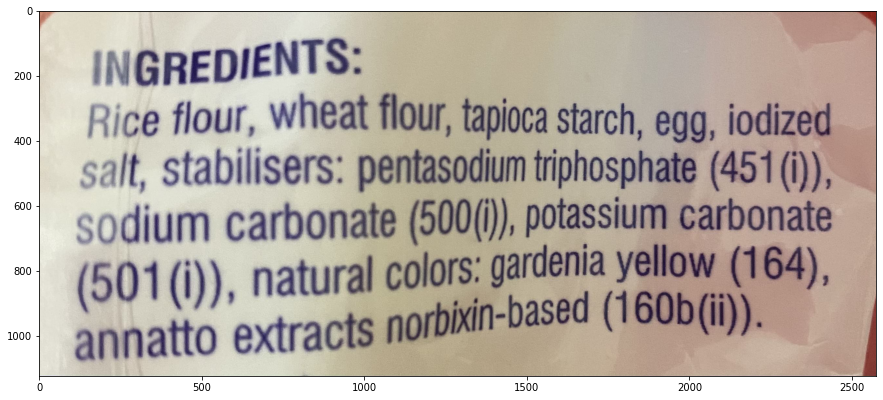

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/FINAL PROJECT/Data/OCR labels/Train/Nui_1.jpg"

plt.figure(figsize=(15,15))
img = Image.open(path)
plt.imshow(img)
plt.show()

In [ ]:
string2additives(ocr2string(img))

This product might contain these additives: 


,Number,Name,Other Name,Usage,Side Effects
28,E160b,Annatto,"Bixin, Norbixin, Annatto Extracts",Orange/peach pigment naturally present in butter and cheese.,"Annatto is safe for most people in general. Some may experience an allergic reaction to it, including itchiness, swelling, low blood pressure, hives, and stomach pain. The FSA recommended that children showing signs of hyperactivity or attention deficit hyperactivity disorder (ADHD) should avoid"
333,E164,Gardenia Yellow,Gardenia Yellow,"Used in the food and beverage industry as a preservative and as an emulsifier, specifically in seafood, meats, and poultry, can make seafood appear firmer, smoother and glossier","Should be avoided by certain people, including those with Kidney Disease"
334,E451i,Sodium Phosphate (STP),"Pentasodium Triphosphate, Sodium Tripolyphosphate (STTP) or Tripolyphosphate (TPP)","Natural food colorant, a water soluble yellow food color",Not allowed in European Countries
332,E500i,Sodium Carbonate,Soda Ash or Washing Soda,"Acidity regulator, anticaking agent, raising agent, and stabilize","Large amounts cause corrosion of the gut, gastric upsets, circulation problems"
217,E501i,Potassium carbonates,Potassium Carbonates,"A water-soluble salt with its main applications in the production of glass, detergents (soaps), ceramics, fertilizers, agrochemicals, pharmaceuticals, food, feed, fire extinguisher, drying agent for solvents and etc",None Known


##Test 2

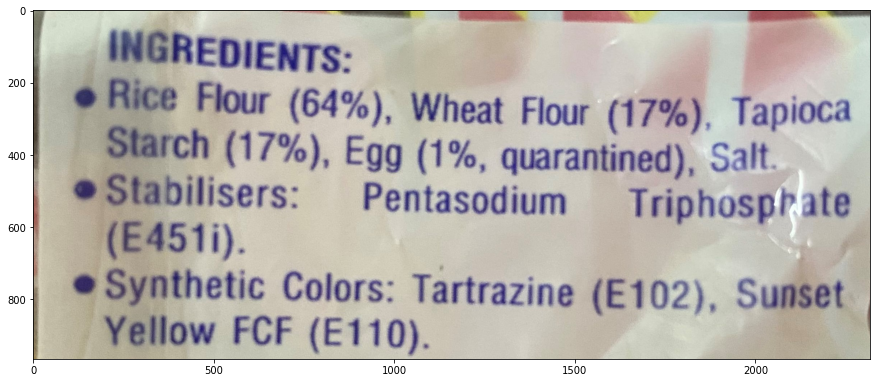

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/FINAL PROJECT/Data/OCR labels/Train/Nui_2.jpg"

plt.figure(figsize=(15,15))
img = Image.open(path)
plt.imshow(img)
plt.show()

In [ ]:
string2additives(ocr2string(img))

This product might contain these additives: 


,Number,Name,Other Name,Usage,Side Effects
2,E102,Tartrazine,Yellow 5,Widely used yellow/orange colour,"Hyperactivity, Asthma, Urticaria, Rhinitis, Bronchospasm, Blurred vision, Skin problems, Insomnia, Night terrors, aspirin sensitivity; migraine, purple skin patches. Banned in Norway and Austria."
4,E110,Sunset Yellow FCF,Yellow 6,"A synthetic coal tar dye, yellow in colour, used with E102","The FSA recommended that children showing signs of hyperactivity or attention deficit hyperactivity disorder (ADHD) should avoid. Some people show allergic reactions to it (rashes, swelling, vomiting), hyperactivity; allergies; aspirin sensitivity, kidney tumours, chromosomal damage, abdominal pain, nausea and vomiting, indigestion, distaste for food; Asthma, Urticaria, Insomnia, Angioedema, seen increased incidence of tumours in animals."
334,E451i,Sodium Phosphate (STP),"Pentasodium Triphosphate, Sodium Tripolyphosphate (STTP) or Tripolyphosphate (TPP)","Natural food colorant, a water soluble yellow food color",Not allowed in European Countries


##Test 3

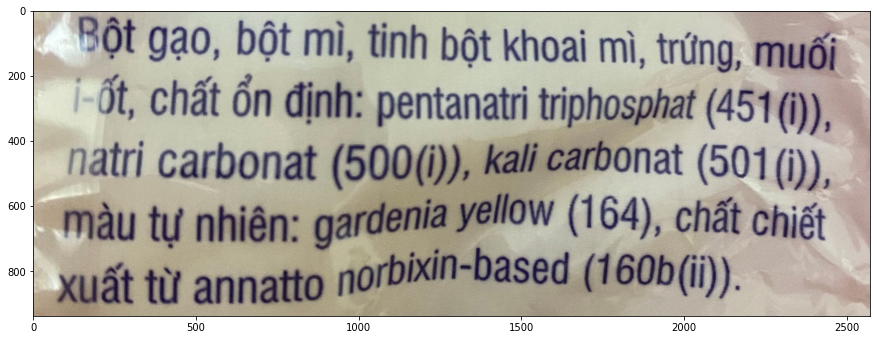

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/FINAL PROJECT/Data/OCR labels/Train/IMG_4024.jpg"

plt.figure(figsize=(15,15))
img = Image.open(path)
plt.imshow(img)
plt.show()

In [ ]:
string2additives(ocr2string(img))

This product might contain these additives: 


,Number,Name,Other Name,Usage,Side Effects
49,E160b,Annatto,"Bixin, Norbixin, Annatto Extracts",Orange/peach pigment naturally present in butter and cheese.,"Annatto is safe for most people in general. Some may experience an allergic reaction to it, including itchiness, swelling, low blood pressure, hives, and stomach pain. The FSA recommended that children showing signs of hyperactivity or attention deficit hyperactivity disorder (ADHD) should avoid"
59,E164,Gardenia Yellow,Gardenia Yellow,"Used in the food and beverage industry as a preservative and as an emulsifier, specifically in seafood, meats, and poultry, can make seafood appear firmer, smoother and glossier","Should be avoided by certain people, including those with Kidney Disease"
198,E451,Triphosphates,Soda Ash or Disodium Carbonate,"Emulsifiers, Humectant, Sequestrant, Stabiliser, Thickener","Breathing problems, Diarrhea and vomiting, Eye irritation, Low blood pressure"
235,E500i,Sodium Carbonate,Soda Ash or Washing Soda,"Acidity regulator, anticaking agent, raising agent, and stabilize","Large amounts cause corrosion of the gut, gastric upsets, circulation problems"
